In [ ]:
import pandas as pd
from pathlib import Path
from tqdm.auto import tqdm

df = None

for i in tqdm(range(1, 18001), desc="Bin size", position=0, leave=True):

    path = Path("./results")
    path.mkdir(exist_ok=True)
    path = path / f"binSize@{i}"
    path.mkdir(exist_ok=True)
    
    if not (path / "ROC_results.csv").is_file():
        continue
        
    if df is None:
        df = pd.read_csv(path / "ROC_results.csv")
        df.rename(columns={'ROCAUC':f'ROCAUC@{i}'}, inplace=True)
    else:
        df_new = pd.read_csv(path / "ROC_results.csv")
        df_new.rename(columns={'ROCAUC':f'ROCAUC@{i}'}, inplace=True)
        
        df = pd.merge(df, df_new, on=["class", "n_positives", "n_negatives"])


Bin size:   0%|          | 0/18000 [00:00<?, ?it/s]

In [ ]:
df = df.set_index(['class'])

In [ ]:
selected = df.loc[["macro","micro"],:]
selected = selected.T.dropna()
selected

class,macro,micro
ROCAUC@1,0.900456,0.926713
ROCAUC@2,0.899649,0.930200
ROCAUC@3,0.896508,0.926271
ROCAUC@4,0.899162,0.929691
ROCAUC@5,0.900907,0.932676
ROCAUC@6,0.899373,0.930095
ROCAUC@8,0.896637,0.930459
ROCAUC@9,0.896059,0.928072
ROCAUC@10,0.897248,0.932482
ROCAUC@12,0.897418,0.931337


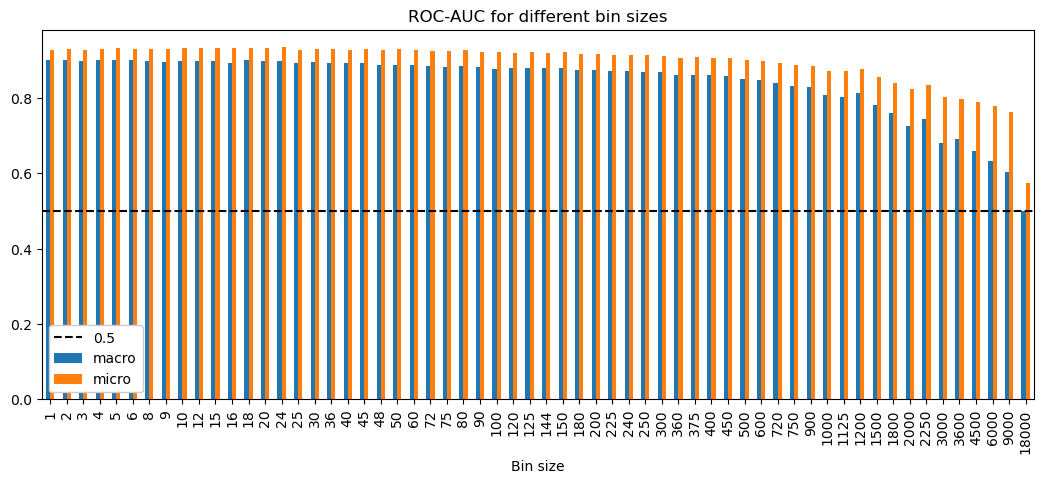

In [ ]:
import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use("default")

plot_df = selected.loc[~selected.index.isin(["ROCAUC"]),:]
plot_df.index = plot_df.index.str.removeprefix("ROCAUC@")

ax = plot_df.plot.bar(xlabel = "Bin size", figsize = (12.8, 4.8))
ax.set_title("ROC-AUC for different bin sizes")
ax.axhline(y=0.5, linestyle="--", label="0.5", color="black")
#ax.set_xscale("log")

ax.legend(loc="lower left", framealpha=1)

plt.savefig('./ROCAUC-BinSizes.pdf', transparent=True, format= "pdf", bbox_inches = "tight")

In [ ]:
import pandas as pd
from pathlib import Path
from tqdm.auto import tqdm

df = None

for i in tqdm(range(1, 18001), desc="Bin size", position=0, leave=True):

    path = Path("./results")
    path.mkdir(exist_ok=True)
    path = path / f"binSize@{i}"
    path.mkdir(exist_ok=True)
    
    if not (path / "PR_results.csv").is_file():
        continue
        
    if df is None:
        df = pd.read_csv(path / "PR_results.csv")
        df.rename(columns={'PrecisionRecallAUC':f'PrecisionRecallAUC@{i}'}, inplace=True)
    else:
        df_new = pd.read_csv(path / "PR_results.csv")
        df_new.rename(columns={'PrecisionRecallAUC':f'PrecisionRecallAUC@{i}'}, inplace=True)
        
        df = pd.merge(df, df_new, on=["class", "FrequencyPositiveClass","n_positives", "n_negatives"])


Bin size:   0%|          | 0/18000 [00:00<?, ?it/s]

In [ ]:
df = df.set_index(['class'])

In [ ]:
selected = df.loc[["macro","micro"],:]
selected = selected.T.dropna()
selected

class,macro,micro
PrecisionRecallAUC@1,0.766120,0.861704
PrecisionRecallAUC@2,0.761699,0.863317
PrecisionRecallAUC@3,0.753266,0.859146
PrecisionRecallAUC@4,0.760271,0.861901
PrecisionRecallAUC@5,0.759274,0.866302
PrecisionRecallAUC@6,0.761953,0.865789
PrecisionRecallAUC@8,0.752745,0.861491
PrecisionRecallAUC@9,0.754802,0.863313
PrecisionRecallAUC@10,0.753200,0.859522
PrecisionRecallAUC@12,0.757217,0.863595


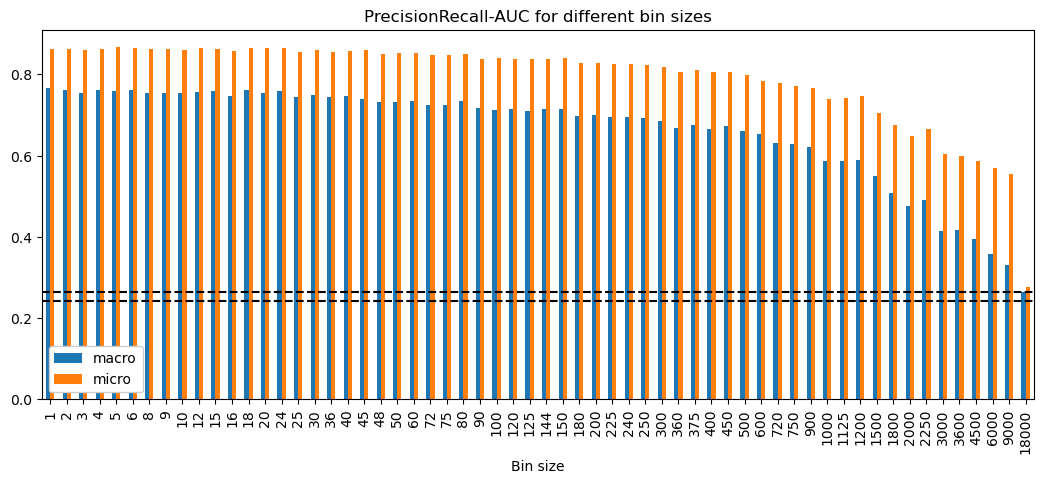

In [ ]:
import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use("default")


plot_df = selected.loc[~selected.index.isin(["PrecisionRecallAUC"]),:]
plot_df.index = plot_df.index.str.removeprefix("PrecisionRecallAUC@")

ax = plot_df.plot.bar(xlabel = "Bin size", figsize = (12.8, 4.8))
ax.set_title("PrecisionRecall-AUC for different bin sizes")

ax.legend(loc="lower left", framealpha=1)
ax.axhline(y=0.24274439918533605, linestyle="--", label="0.24274439918533605", color="black")
ax.axhline(y=0.265251243713134, linestyle="--", label="0.24274439918533605", color="black")

plt.savefig('./PrecisionRecallAUC-BinSizes.pdf', transparent=True, format= "pdf", bbox_inches = "tight")